##  In this project we are going to perform Natural Language Processing. We are going to use Bag Of Words Technique to predict ham and spam messagaes. Let us import the file.

In [43]:
import pandas as pd
messages = pd.read_csv("E:\DATA scientist\R\Spam\spam.csv", encoding = "cp1252")

In [44]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [45]:
messages.shape

(6776, 5)

In [46]:
messages.isnull().sum()

v1               0
v2               0
Unnamed: 2    6720
Unnamed: 3    6760
Unnamed: 4    6768
dtype: int64

#### As we can see, there are 5 columns, however, we require only first two columns. Hence, we will drop the remaining columns and rename the remaining columns.

In [47]:
messages = messages.iloc[:,[0,1]]

In [48]:
messages.rename( columns = {"v1" : "label","v2":"message"}, inplace = True)

#### Here we will convert the dependant variable into numeric format, such as ham messages will be defined by 0 and spam by 1.

In [49]:
messages.label.replace({"ham":0, "spam":1} , inplace = True )

#### we will convert all the messages into lower case, because the same word with different case will be treated as different words. 

In [50]:
messages.message = messages.message.str.lower()

In [51]:
messages["Length"] = messages["message"].apply(len)

#### Let us import nltk library and downlowd stop words from it. And after that we will import punctuations as well

In [52]:
import nltk

In [53]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIKIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from  nltk.corpus import stopwords 

In [55]:
len(stopwords.words("english"))

179

In [56]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
import string

In [58]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
def text_process(mess):            
    """                                                       
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


#### Above is the user defined function which will remove the punctuations and stopwords from the data. We will apply this function and get our data cleaned. 

In [60]:
messages['message'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: message, Length: 6776, dtype: object

#### Now we will apply bag of words technique using Countvectorizer. 

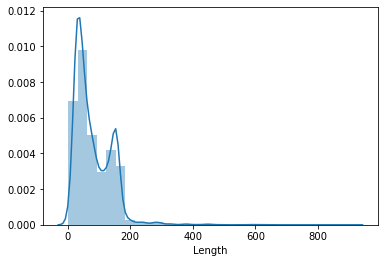

In [61]:
import seaborn as sns
sns.distplot(messages["Length"], bins = 30)

#### The above distance plot tells us that the length of the messages is mostly between 0 to 200.

#### What is the maximum and minimum lengths of the message?  and which are those message?

In [37]:
messages["Length"].max()

910

In [38]:
messages[messages["Length"] == messages["Length"].max()]["message"].iloc[0]

"for me the love should start with attraction.i should feel that i need her every time around me.she should be the first thing which comes in my thoughts.i would start the day and end it with her.she should be there every time i dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.i would cry for her.will give all my happiness and take all her sorrows.i will be ready to fight with anyone for her.i will be in love when i will be doing the craziest things for her.love will be when i don't have to proove anyone that my girl is the most beautiful lady on the whole planet.i will always be singing praises for her.love will be when i start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.i would like to say a lot..will tell later.."

In [39]:
messages["Length"].min()

2

In [41]:
messages[messages["Length"] == messages["Length"].min()]["message"].iloc[0]

'ok'

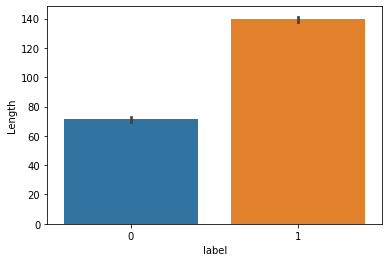

In [40]:
sns.barplot(x = "label", y = "Length", data = messages)

#### The above bar plot gives us the idea of distribution of Ham and Spam messages. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB4326B9A0>,
      dtype=object)

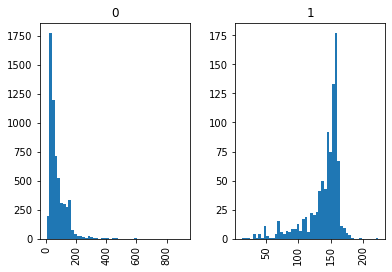

In [62]:
messages.hist(column= "Length",by = "label", bins = 50)

#### Here with the help of bar plots we can see that Ham messages have length concentrated between 0 and 200 whereas spam messages have the length concentrated between 100 and 170

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
bow_transformer =    CountVectorizer(analyzer = text_process ).fit(messages["message"])

In [65]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [66]:
len(bow_transformer.vocabulary_)

9422

#### As we can see, there are 9422 unique words. We will transform our data into sparse matrics. 

In [69]:
messages_bow = bow_transformer.transform(messages.message)

In [73]:
messages_bow.shape

(6776, 9422)

#### There are 6776 records & 9422 columns. Now we are ready to split the data and apply Naive Bayes algorithm on it. 

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(messages_bow, messages.label, test_size = 0.2, random_state = 101)

In [101]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

In [102]:
NB.fit(x_train,y_train)

MultinomialNB()

In [103]:
pred = NB.predict(x_test)

In [104]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred, y_test)
tab1

array([[1161,    6],
       [  17,  172]], dtype=int64)

In [105]:
accuracy = tab1.diagonal().sum() * 100 /tab1.sum()

In [106]:
accuracy

98.30383480825958

In [108]:
import numpy as np
precision = tab1[0,0] / np.sum(tab1[0,0] + tab1[1,0])

In [109]:
precision*100

98.55687606112055

In [110]:
recall = tab1[0,0] / np.sum(tab1[0,0] + tab1[0,1])
recall*100

99.48586118251927

### Our model has recall of 99.50%, which is a really good result. The model predicts the spam messages well. 